In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [37]:
# create a dataframe to store results
mf_rbf_gpr_results = pd.DataFrame()
# use a for loop to read all csv files

input = pd.read_csv("exp_mf_rbf_gpr_input.csv", index_col=0)
output = pd.read_csv("exp_mf_rbf_gpr_output.csv", index_col=0)
# merge input and output dataframes
df = pd.merge(input, output, left_index=True, right_index=True)
mf_rbf_gpr_results = pd.concat([mf_rbf_gpr_results, df])

In [38]:
mf_rbf_gpr_results

,noise_std,num_hf,num_lf,problem,seed,progress,mf_normalized_mae,mf_normalized_rmse,mf_r2,mf_mean_log_likelihood,mf_learned_noise_std,mf_cpu_time,sf_normalized_mae,sf_normalized_rmse,sf_r2,sf_mean_log_likelihood,sf_learned_noise_std,sf_cpu_time
0,0.1,5,200,mf_Booth,10,finished,0.300321,0.059590,0.997042,-3.972107,2.517020,2.999595,3.323430,1.029194,0.117494,-28.068839,0.004403,0.290305
1,0.3,5,200,mf_Booth,10,finished,0.300290,0.059404,0.997060,-3.974745,2.914867,2.558192,3.322895,1.029353,0.117222,-28.164789,0.004404,0.349241
2,0.5,5,200,mf_Booth,10,finished,0.300474,0.059667,0.997034,-3.999062,2.903658,3.778743,3.321334,1.029139,0.117587,-28.142133,0.004404,0.331886
3,0.1,10,200,mf_Booth,10,finished,0.059947,0.007778,0.999950,-1.678761,0.520345,2.514228,0.736889,0.083461,0.994196,-4.117595,0.003516,2.406405
4,0.3,10,200,mf_Booth,10,finished,0.060345,0.009047,0.999932,-1.938458,0.768813,3.713090,0.741991,0.082918,0.994272,-4.124738,0.003515,0.554894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.3,45,200,mf_Booth,100,finished,0.015461,0.000941,0.999999,-0.469096,0.335502,7.230594,0.046606,0.003082,0.999992,-0.643699,0.352494,4.458353
296,0.5,45,200,mf_Booth,100,finished,0.017924,0.001483,0.999998,-1.053393,0.608597,6.228377,0.055282,0.003825,0.999988,-1.088534,0.569261,4.183110
297,0.1,50,200,mf_Booth,100,finished,0.008584,0.000486,1.000000,0.526890,0.114814,7.016984,0.019407,0.001336,0.999998,0.249915,0.111483,5.836730
298,0.3,50,200,mf_Booth,100,finished,0.017684,0.001028,0.999999,-0.483141,0.316942,8.071027,0.037081,0.002634,0.999994,-0.713128,0.301362,5.132992


Text(0.5, 1.0, 'Log Likelihood')

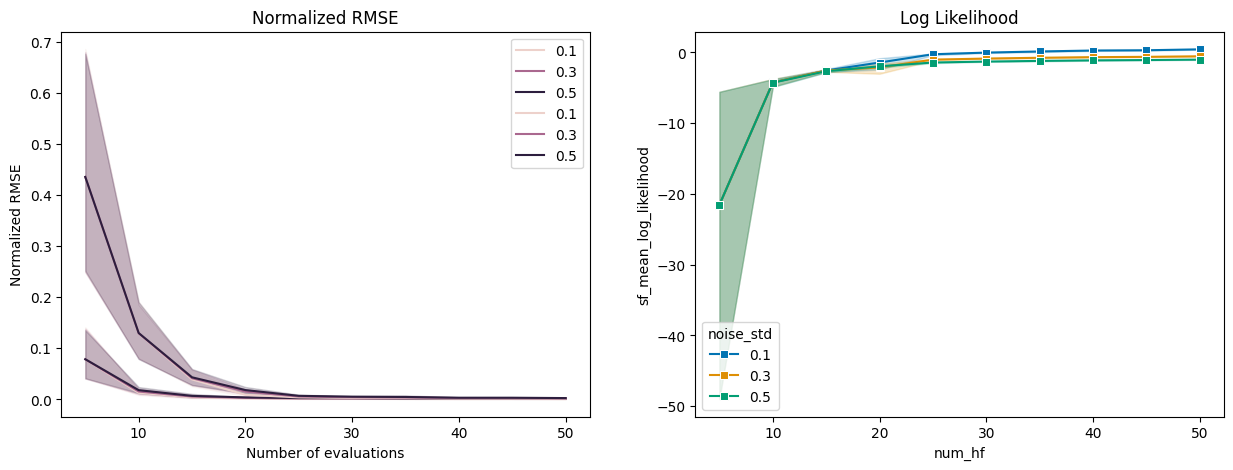

In [57]:
# plot the results of the mf_rbf_lf_200 and gpr_rbf_booth experiments using number of evaluations as x and normalized rmse and log likelihood as y
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.lineplot(data=mf_rbf_gpr_results, x="num_hf", y="mf_normalized_rmse", hue="noise_std",
             ax=ax[0])
sns.lineplot(data=mf_rbf_gpr_results, x="num_hf", y="sf_normalized_rmse", hue="noise_std",
             ax=ax[0])
ax[0].set_title("Normalized RMSE")
ax[0].set_xlabel("Number of evaluations")
ax[0].set_ylabel("Normalized RMSE")
ax[0].legend()
# sns.lineplot(data=mf_rbf_gpr_results, x="num_hf", y="mf_mean_log_likelihood", hue="noise_std", palette='colorblind', marker='^', legend='full',
#              ax=ax[1])
sns.lineplot(data=mf_rbf_gpr_results, x="num_hf", y="sf_mean_log_likelihood", hue="noise_std", palette='colorblind', marker='s', legend='full',
             ax=ax[1])
ax[1].set_title("Log Likelihood")

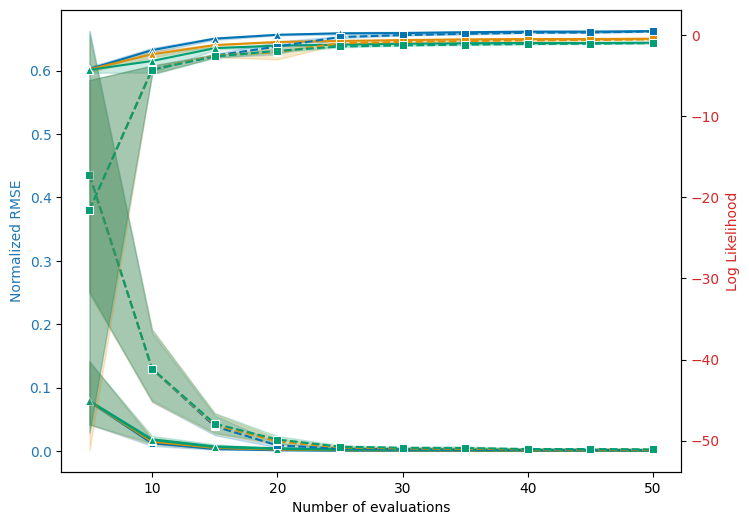

In [58]:
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot normalized RMSE on the left y-axis
color = 'tab:blue'
ax1.set_xlabel('Number of evaluations')
ax1.set_ylabel('Normalized RMSE', color=color)
sns.lineplot(data=mf_rbf_gpr_results, x='num_hf',
             palette='colorblind',
             marker='^',
             legend='full',
             linewidth=2,
             y='mf_normalized_rmse',
             hue="noise_std",
             ax=ax1, )
sns.lineplot(data=mf_rbf_gpr_results,
             x='num_hf',
             hue="noise_std",
             palette='colorblind',
             marker='s',
             legend='full',
             linestyle='dashed',
             y='sf_normalized_rmse',
             ax=ax1, )
ax1.tick_params(axis='y', labelcolor=color)

ax1.get_legend().remove()

# Create another y-axis for log likelihood
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Log Likelihood', color=color)
sns.lineplot(data=mf_rbf_gpr_results, x='num_hf', hue="noise_std", palette='colorblind', marker='^', legend='full',
             y='mf_mean_log_likelihood', ax=ax2, )
sns.lineplot(data=mf_rbf_gpr_results, x='num_hf', hue="noise_std", palette='colorblind', marker='s', legend='full', linestyle='dashed',
             y='sf_mean_log_likelihood', ax=ax2, )
ax2.tick_params(axis='y', labelcolor=color)
ax2.get_legend().remove()
# set the legend scale of the right y-axis into log scale
# ax2.set_yscale('log')

# add legend

plt.show()